# Analyzing Wine Countries: Marketing Prioritization


In this notebook, we will analyze the wine countries in our database to determine which country we should prioritize for our marketing efforts this year.
To make this decision, we'll consider factors such as average wine ratings, wine counts, and an impact score that takes into account both these factors.

#### Analyzing Average Rating and Wine Count

We begin by analyzing both the average wine rating and wine count for each country. This helps us gain insights into the quality and variety of wines available in different countries. To achieve this, we utilize SQL queries and join the relevant tables in our database to gather information on countries, regions, and wines. By using the GROUP BY clause, we aggregate the data by country, calculating the average rating and wine count.

For the first script, we order the results by average rating in descending order. This provides a ranked list of countries where the wines are highly rated by consumers.

For the second script, we order the results by wine count in descending order. This gives us a ranked list of countries that offer a large variety of wines.


In [2]:
#order by rating average
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
db_connection = sqlite3.connect('../data/vivino.db')
cursor = db_connection.cursor()

# Execute the SQL query to calculate average rating and wine count per country and order by average rating
query = """
SELECT countries.name, 
       AVG(wines.ratings_average), 
       COUNT(wines.id)
FROM countries
JOIN regions ON countries.code = regions.country_code
JOIN wines ON regions.id = wines.region_id
GROUP BY countries.name
ORDER BY AVG(wines.ratings_average) DESC;
"""

cursor.execute(query)
result = cursor.fetchall()

# Print the result
for row in result:
    country_name, avg_rating, wine_count = row
    print(f"Country: {country_name}, Average Rating: {avg_rating:.2f}, Wine Count: {wine_count}")

# Close the cursor and connection
cursor.close()
db_connection.close()

Country: Allemagne, Average Rating: 4.50, Wine Count: 14
Country: Israël, Average Rating: 4.50, Wine Count: 1
Country: États-Unis, Average Rating: 4.49, Wine Count: 74
Country: Moldavie, Average Rating: 4.48, Wine Count: 5
Country: Hongrie, Average Rating: 4.47, Wine Count: 11
Country: Afrique du Sud, Average Rating: 4.46, Wine Count: 22
Country: Australie, Average Rating: 4.46, Wine Count: 12
Country: France, Average Rating: 4.45, Wine Count: 331
Country: Espagne, Average Rating: 4.44, Wine Count: 94
Country: Portugal, Average Rating: 4.44, Wine Count: 28
Country: Chili, Average Rating: 4.43, Wine Count: 16
Country: Italie, Average Rating: 4.43, Wine Count: 383
Country: Argentine, Average Rating: 4.42, Wine Count: 23
Country: Roumanie, Average Rating: 4.40, Wine Count: 1
Country: Grèce, Average Rating: 4.40, Wine Count: 2
Country: Suisse, Average Rating: 4.35, Wine Count: 2
Country: Croatie, Average Rating: 4.30, Wine Count: 1


In [3]:
#order by wine count
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
db_connection = sqlite3.connect('../data/vivino.db')
cursor = db_connection.cursor()

# Execute the SQL query to calculate average rating and wine count per country and order by average rating
query = """
SELECT countries.name, 
       AVG(wines.ratings_average), 
       COUNT(wines.id)
FROM countries
JOIN regions ON countries.code = regions.country_code
JOIN wines ON regions.id = wines.region_id
GROUP BY countries.name
ORDER BY COUNT(wines.id) DESC;
"""

cursor.execute(query)
result = cursor.fetchall()

# Print the result
for row in result:
    country_name, avg_rating, wine_count = row
    print(f"Country: {country_name}, Average Rating: {avg_rating:.2f}, Wine Count: {wine_count}")

# Close the cursor and connection
cursor.close()
db_connection.close()

Country: Italie, Average Rating: 4.43, Wine Count: 383
Country: France, Average Rating: 4.45, Wine Count: 331
Country: Espagne, Average Rating: 4.44, Wine Count: 94
Country: États-Unis, Average Rating: 4.49, Wine Count: 74
Country: Portugal, Average Rating: 4.44, Wine Count: 28
Country: Argentine, Average Rating: 4.42, Wine Count: 23
Country: Afrique du Sud, Average Rating: 4.46, Wine Count: 22
Country: Chili, Average Rating: 4.43, Wine Count: 16
Country: Allemagne, Average Rating: 4.50, Wine Count: 14
Country: Australie, Average Rating: 4.46, Wine Count: 12
Country: Hongrie, Average Rating: 4.47, Wine Count: 11
Country: Moldavie, Average Rating: 4.48, Wine Count: 5
Country: Suisse, Average Rating: 4.35, Wine Count: 2
Country: Grèce, Average Rating: 4.40, Wine Count: 2
Country: Roumanie, Average Rating: 4.40, Wine Count: 1
Country: Israël, Average Rating: 4.50, Wine Count: 1
Country: Croatie, Average Rating: 4.30, Wine Count: 1


#### Calculating Impact Score
To make a well-informed marketing decision, we create an impact score that combines both average rating and wine count. The impact score is calculated by multiplying the average rating by the wine count for each country. This combined metric allows us to assess the potential influence of a country's wines in a holistic manner.

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
db_connection = sqlite3.connect('../data/vivino.db')
cursor = db_connection.cursor()

# Execute the SQL query
query = """
SELECT countries.name AS country_name, 
       AVG(wines.ratings_average) AS avg_rating, 
       COUNT(wines.id) AS wine_count,
       SUM(wines.ratings_count) AS count_rating,
       (AVG(wines.ratings_average) * COUNT(wines.id)) AS impact_score
FROM countries
JOIN regions ON countries.code = regions.country_code
JOIN wines ON regions.id = wines.region_id
GROUP BY countries.name
ORDER BY impact_score DESC;
"""

cursor.execute(query)
result = cursor.fetchall()


df_query = pd.read_sql_query(query, db_connection)
print(df_query.shape)
display(df_query)
df_query.to_csv("../data/csv/question_2_0.csv")
# Close the cursor and connection
cursor.close()
db_connection.close()


(17, 5)


,country_name,avg_rating,wine_count,count_rating,impact_score
0,Italie,4.430026,383,2135839,1696.7
1,France,4.447130,331,2124809,1472.0
2,Espagne,4.443617,94,746710,417.7
3,États-Unis,4.490541,74,834263,332.3
4,Portugal,4.435714,28,62454,124.2
5,Argentine,4.417391,23,283673,101.6
6,Afrique du Sud,4.459091,22,59995,98.1
7,Chili,4.431250,16,159256,70.9
8,Allemagne,4.500000,14,8257,63.0
9,Australie,4.458333,12,52138,53.5


##### Add pie chart

,country_name,impact_score
0,Italie,1696.7
1,France,1472.0
2,Espagne,417.7
3,États-Unis,332.3
0,others,613.6


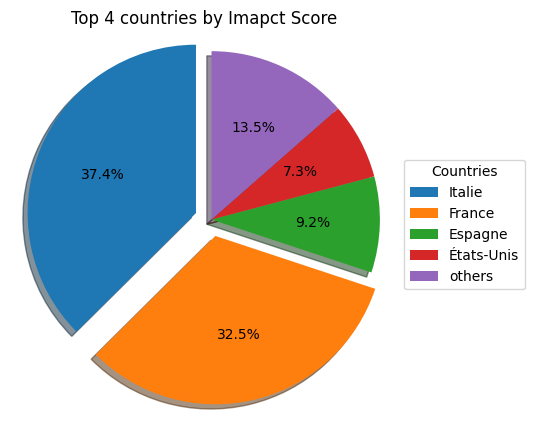

In [22]:
df_query_impact_score = df_query[["country_name", "impact_score"]]

df_query_impact_score_top_4 = df_query_impact_score.iloc[0:4,:]

new_row = {'country_name': ['others'], 'impact_score': [sum(df_query_impact_score.iloc[4:,1])]}
df_query_impact_score_others = pd.DataFrame(new_row)
df_query_impact_score_top_4_rest = pd.concat([df_query_impact_score_top_4, df_query_impact_score_others])

df_query_impact_score_top_4_rest.reset_index(drop=True)

display(df_query_impact_score_top_4_rest)
df_query_impact_score_top_4_rest.to_csv("../data/csv/question_2_0b.csv")

fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(
    df_query_impact_score_top_4_rest["impact_score"], 
    labels=df_query_impact_score_top_4_rest["country_name"],
    labeldistance = None,
    explode = (0.1, 0.1, 0, 0, 0),
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)
ax1.set_title('Top 4 countries by Imapct Score', loc='center')
ax1.legend(
    df_query_impact_score_top_4_rest["country_name"],
    title="Countries",
    loc="center left",
    bbox_to_anchor = (1, 0.5)
)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Exploring Detailed Wine Impact

Now, let's further explore the impact of specific wines based on various factors. We're focusing on the top 10 wines with the highest rating counts and average ratings. Our goal is to understand which wines are most popular, reasonably priced, and well-rated across different countries.


(10, 6)


,name,id,AVG(vintages.price_euros),rating_count,avg_rating,country_name
0,Tignanello,1652,430.562500,81378,4.537500,Italie
1,Sassicaia,5078,990.238000,69137,4.220000,Italie
2,Brut Champagne,86684,437.266000,48835,4.580000,France
3,Brut Cuvée Champagne Rosé,8305,72.000000,36681,4.400000,France
4,Bolgheri Superiore,22447,556.971154,28703,4.600000,Italie
5,Grande Cuvée,7122486,245.000000,28513,4.600000,France
6,Opus One,1911534,720.253333,24607,4.650000,États-Unis
7,Brut Rosé Champagne,1211816,81.500000,23241,4.400000,France
8,Brut Rosé Champagne,1148298,49.610000,21147,4.400000,France
9,Cristal Brut Champagne (Millésimé),74304,996.607143,20293,4.642857,France


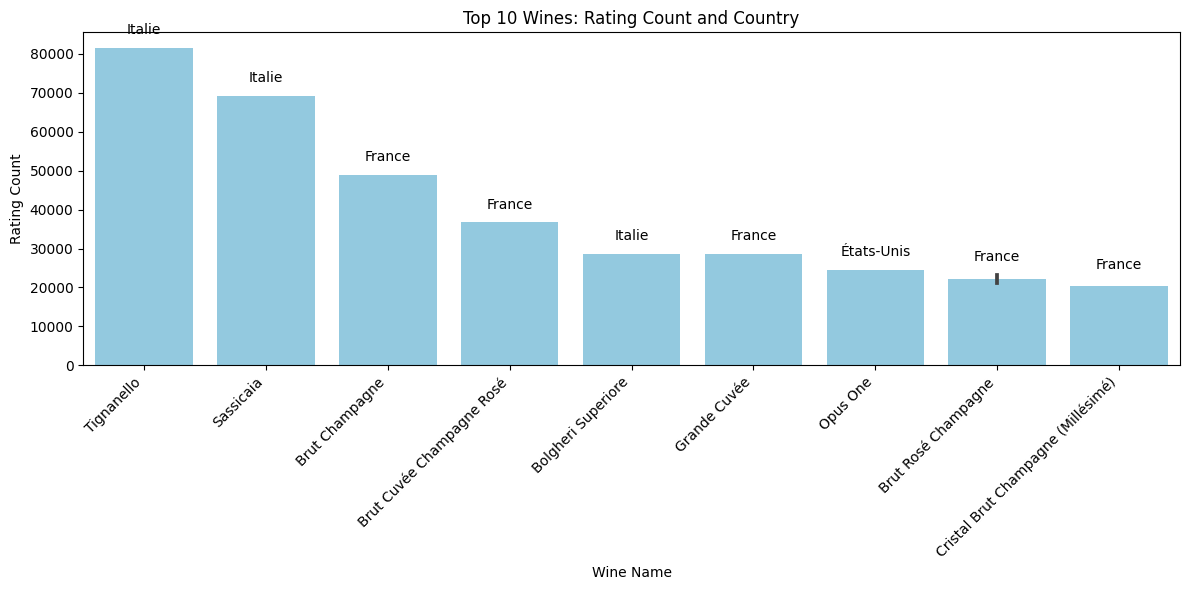

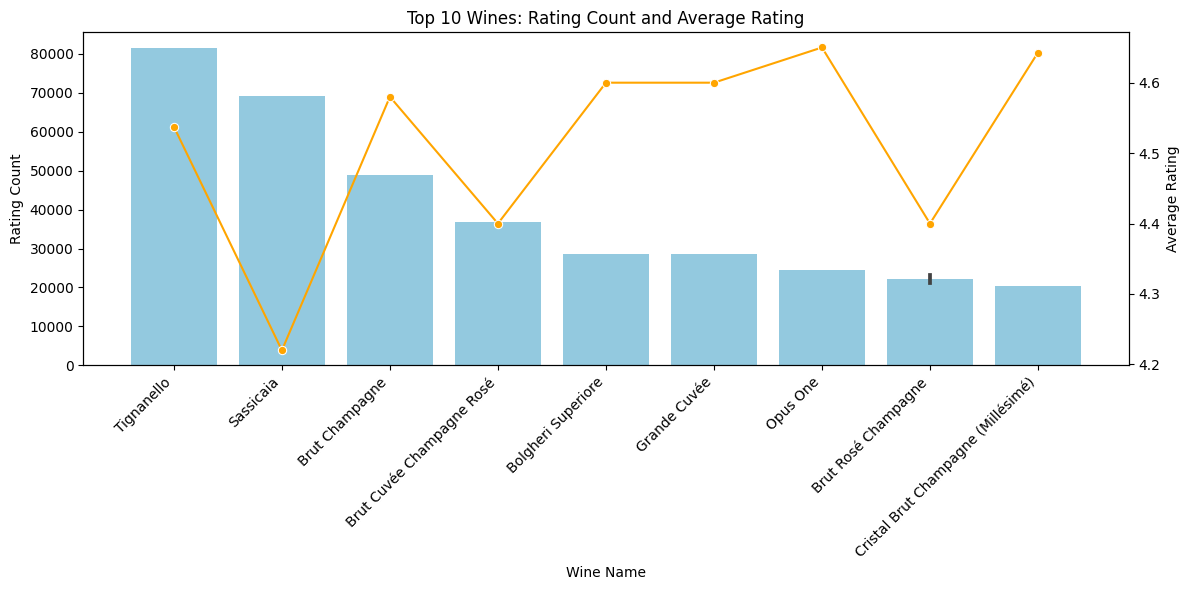

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
db_connection = sqlite3.connect('../data/vivino.db')
cursor = db_connection.cursor()

# Execute the SQL query with sorting
query = """
SELECT wines.name, wines.id, AVG(vintages.price_euros),
       SUM(vintages.ratings_count) AS rating_count,
       AVG(vintages.ratings_average) AS avg_rating,
       countries.name AS country_name
FROM wines
JOIN vintages ON wines.id = vintages.wine_id
JOIN regions ON wines.region_id = regions.id
JOIN countries ON regions.country_code = countries.code
GROUP BY wines.name, wines.id
ORDER BY  rating_count DESC, AVG(vintages.price_euros) ASC, avg_rating DESC
LIMIT 10;
"""

cursor.execute(query)
result = cursor.fetchall()


df_query = pd.read_sql_query(query, db_connection)
print(df_query.shape)
display(df_query)
df_query.to_csv("../data/csv/question_2_1.csv")

df_query = pd.DataFrame(result, columns=['Wine Name', 'Wine ID', 'Average Price (Euros)', 'Rating Count', 'Average Rating', 'Country'])

# Visualize the data using a bar plot
plt.figure(figsize=(12, 6))

# Bar plot for Rating Count
sns.barplot(data=df_query, x='Wine Name', y='Rating Count', color='skyblue')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels

# Annotate with country names
for index, row in df_query.iterrows():
    plt.annotate(row['Country'], (index, row['Rating Count']), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('Wine Name')
plt.ylabel('Rating Count')
plt.title('Top 10 Wines: Rating Count and Country')
plt.tight_layout()

# Show the plot
plt.show()


# Visualize the data using a combined bar and line plot
plt.figure(figsize=(12, 6))

# Bar plot for Rating Count
sns.barplot(data=df_query, x='Wine Name', y='Rating Count', color='skyblue')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels

# Line plot for Average Rating
ax2 = plt.gca().twinx()
sns.lineplot(data=df_query, x='Wine Name', y='Average Rating', marker='o', color='orange', ax=ax2)

plt.xlabel('Wine Name')
plt.ylabel('Rating Count')
ax2.set_ylabel('Average Rating')
plt.title('Top 10 Wines: Rating Count and Average Rating')
plt.tight_layout()

# Show the plot
plt.show()

# Close the cursor and connection
cursor.close()
db_connection.close()


#### Decision Making: Prioritizing Marketing Efforts

With the information we've gathered, we can now decide which country to focus our marketing on this year. We should look at countries with high average ratings, lots of wines, and a big impact score. This decision fits our business goals and strategy.